In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Exploratory Data Analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='age', ylabel='Count'>

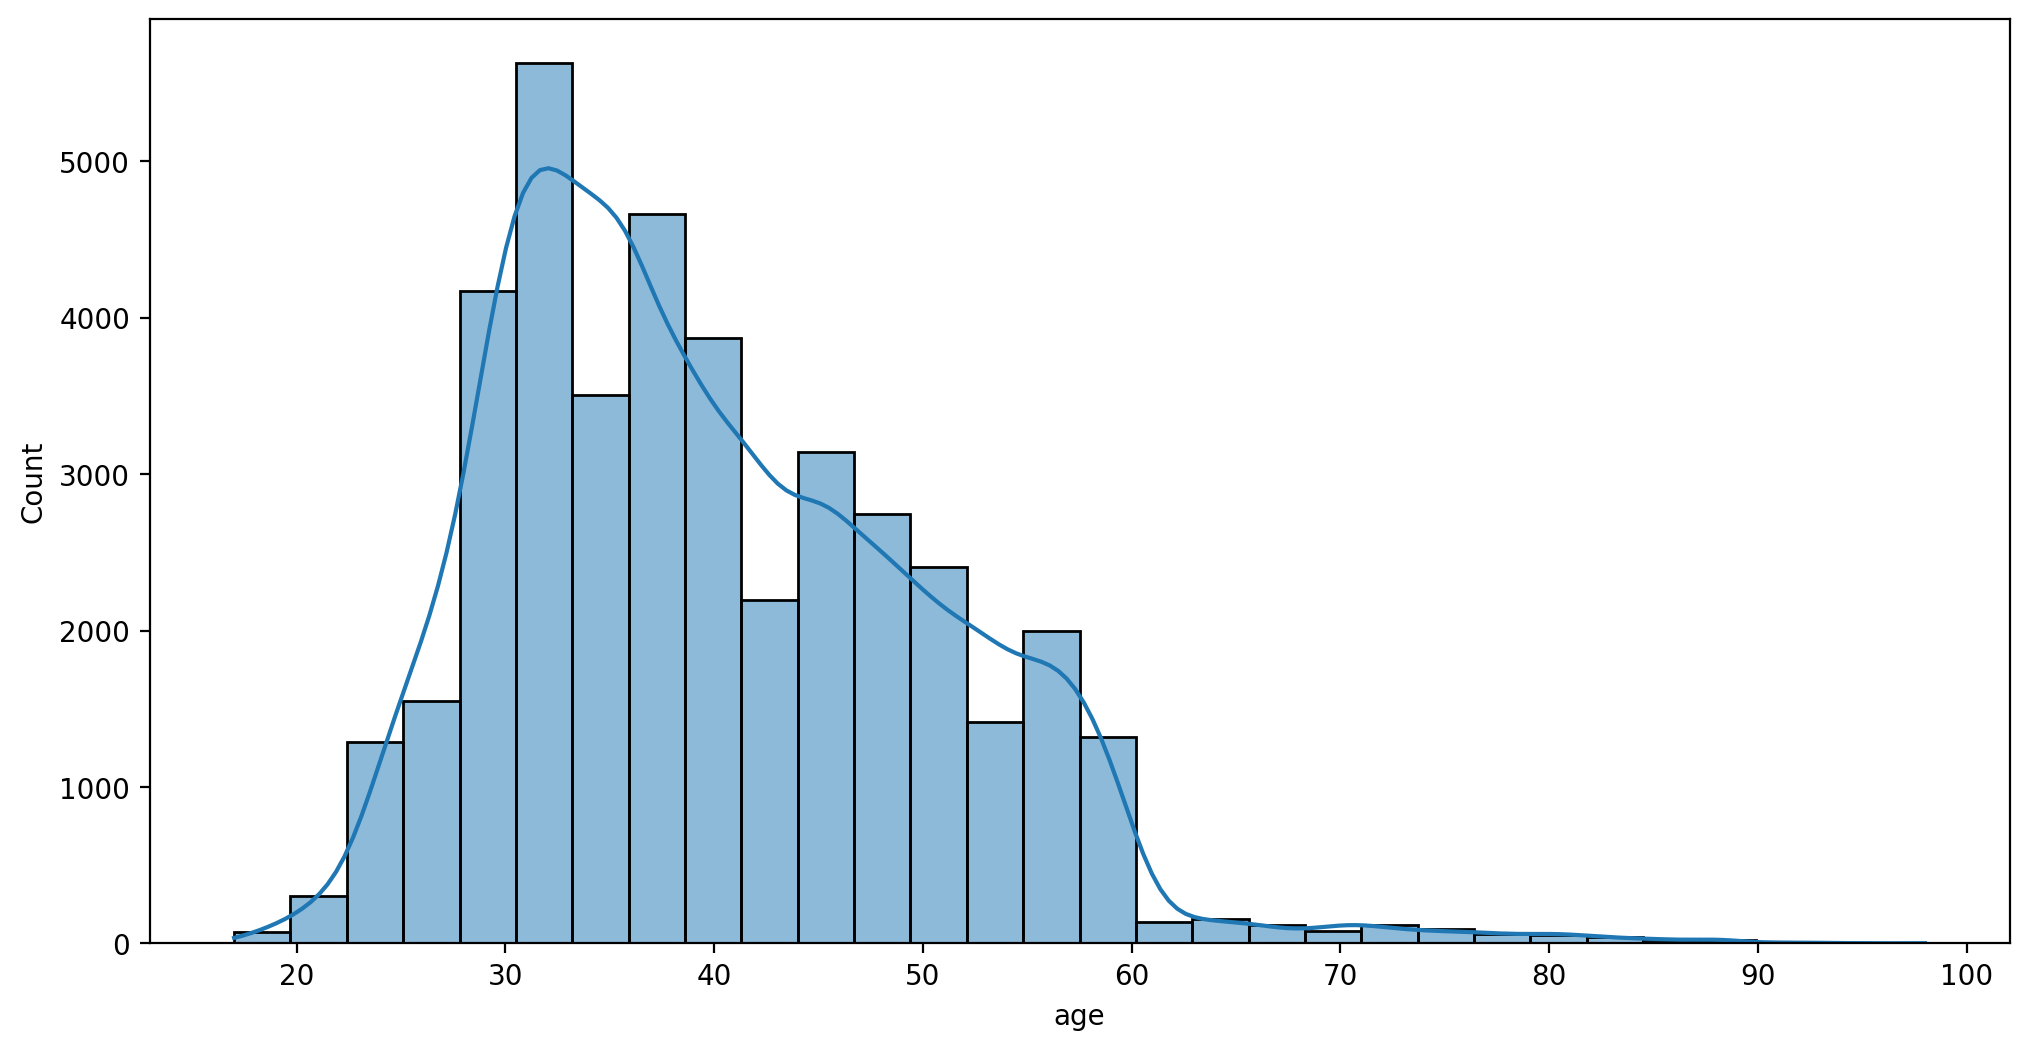

In [6]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'age', bins = 30, kde = True)
#Domain knowledge and data visualization are very important to unsupervised learning

<Axes: xlabel='age', ylabel='Count'>

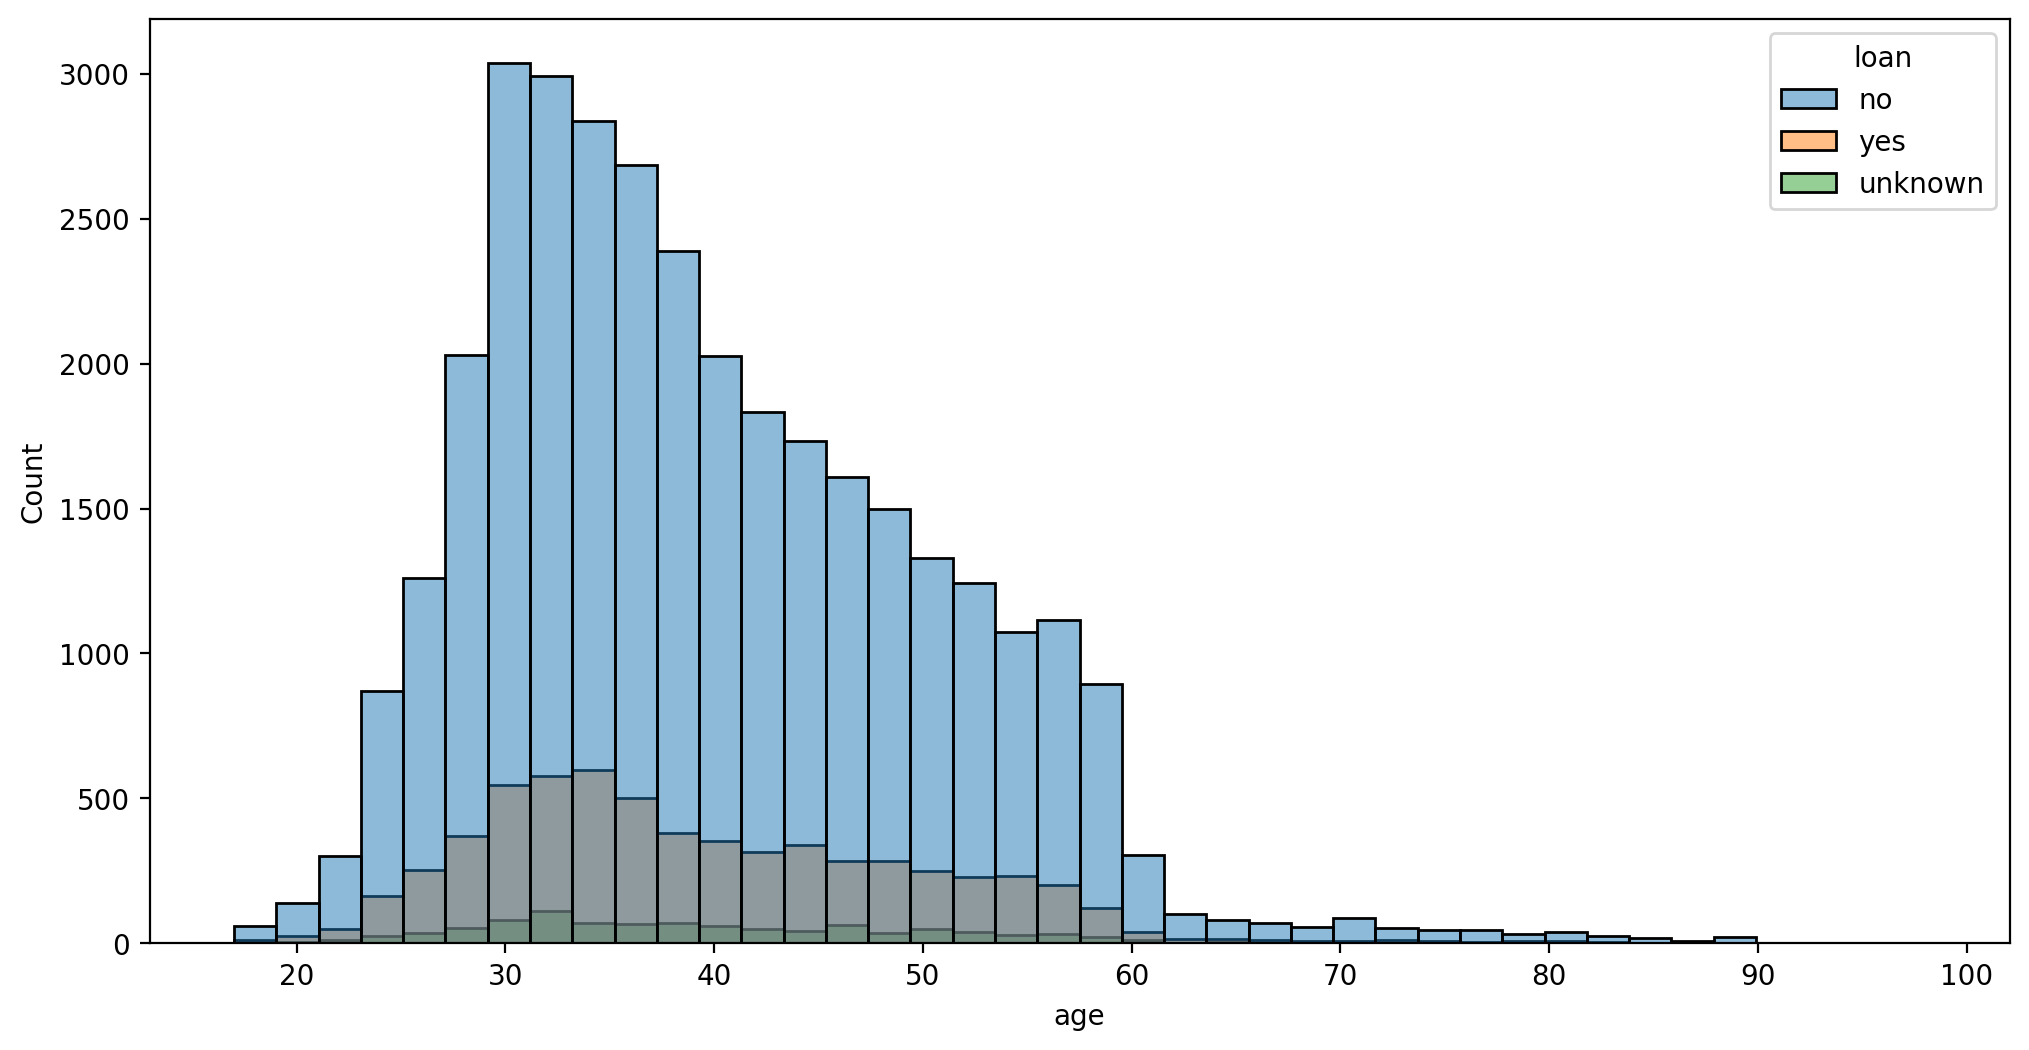

In [7]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'age', bins = 40, hue = 'loan')

<Axes: xlabel='pdays', ylabel='Count'>

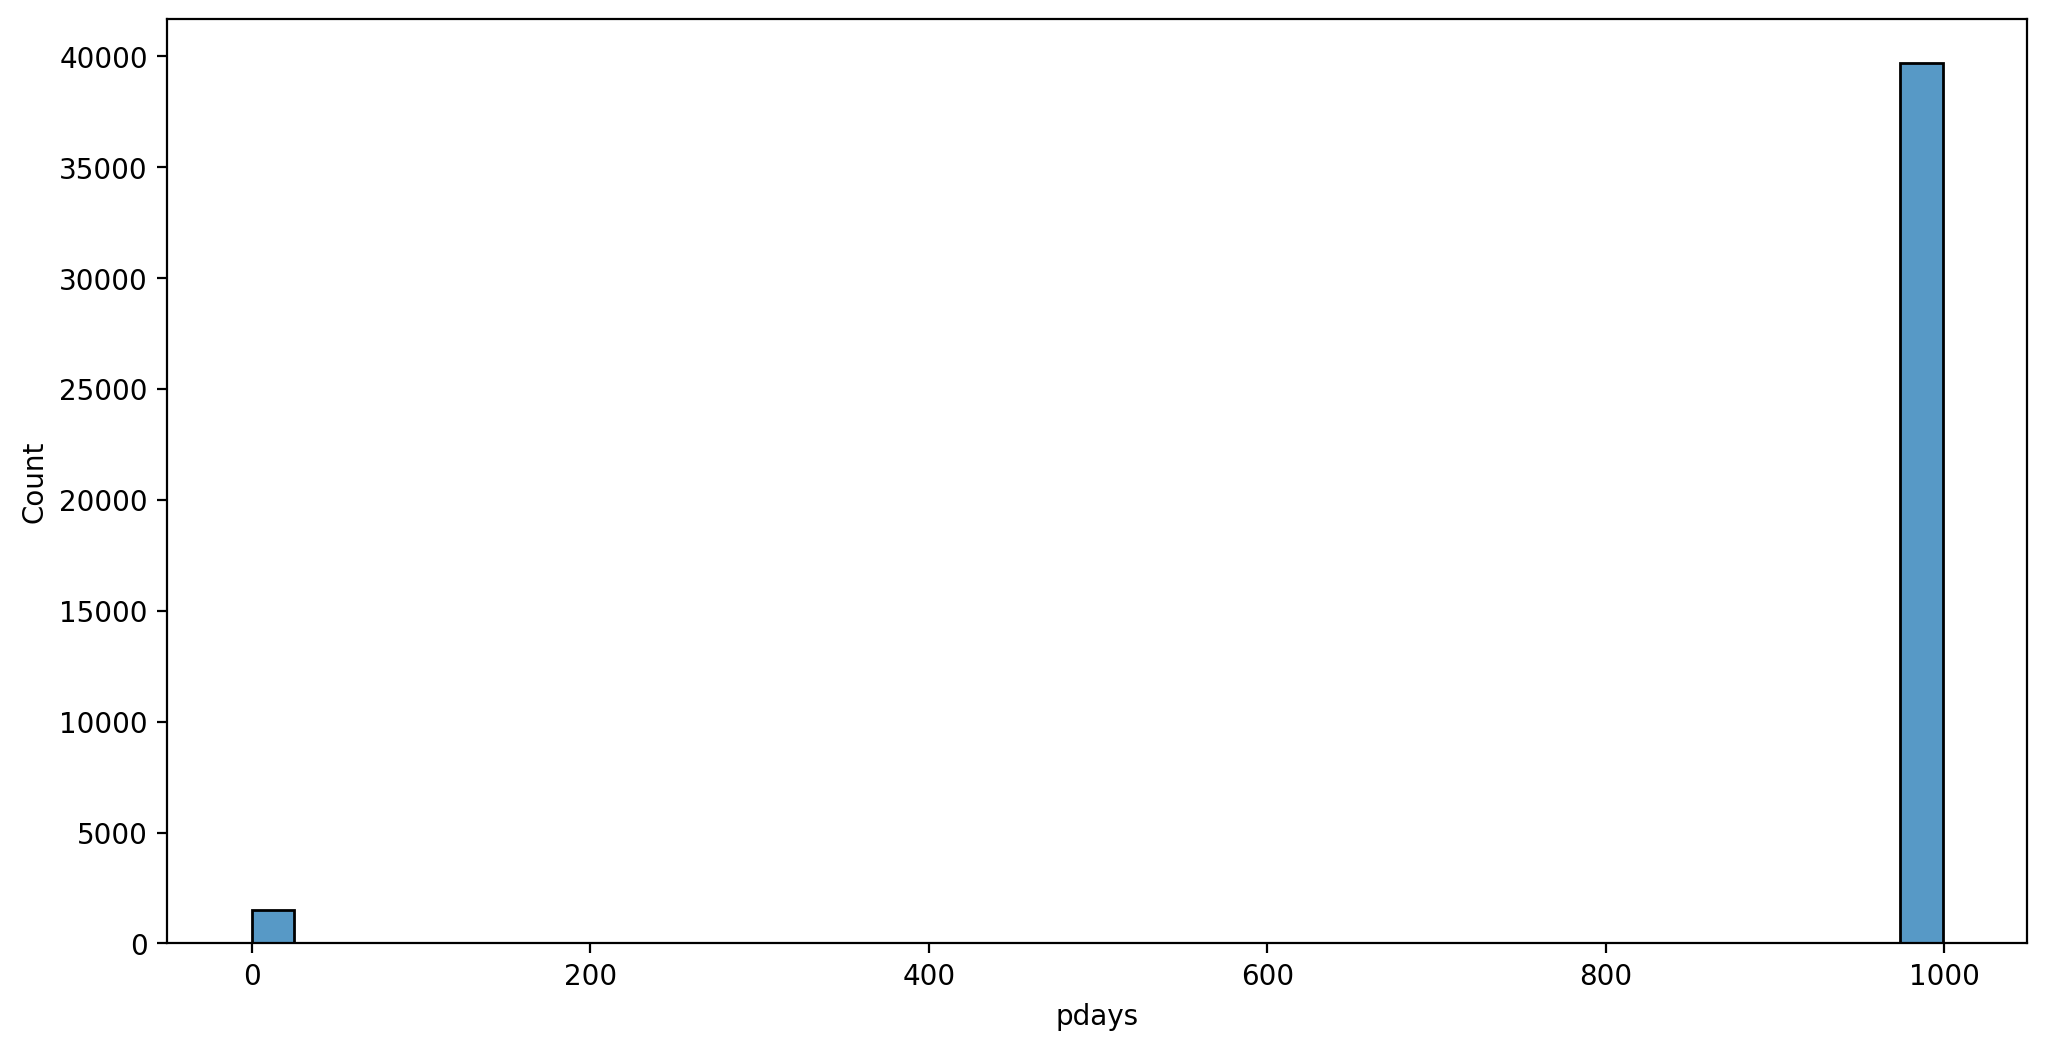

In [8]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'pdays', bins = 40)
#pdays is the number of days that have passed since a certain client was last contacted; pdays = 999 means they were never contacted

<Axes: xlabel='pdays', ylabel='Count'>

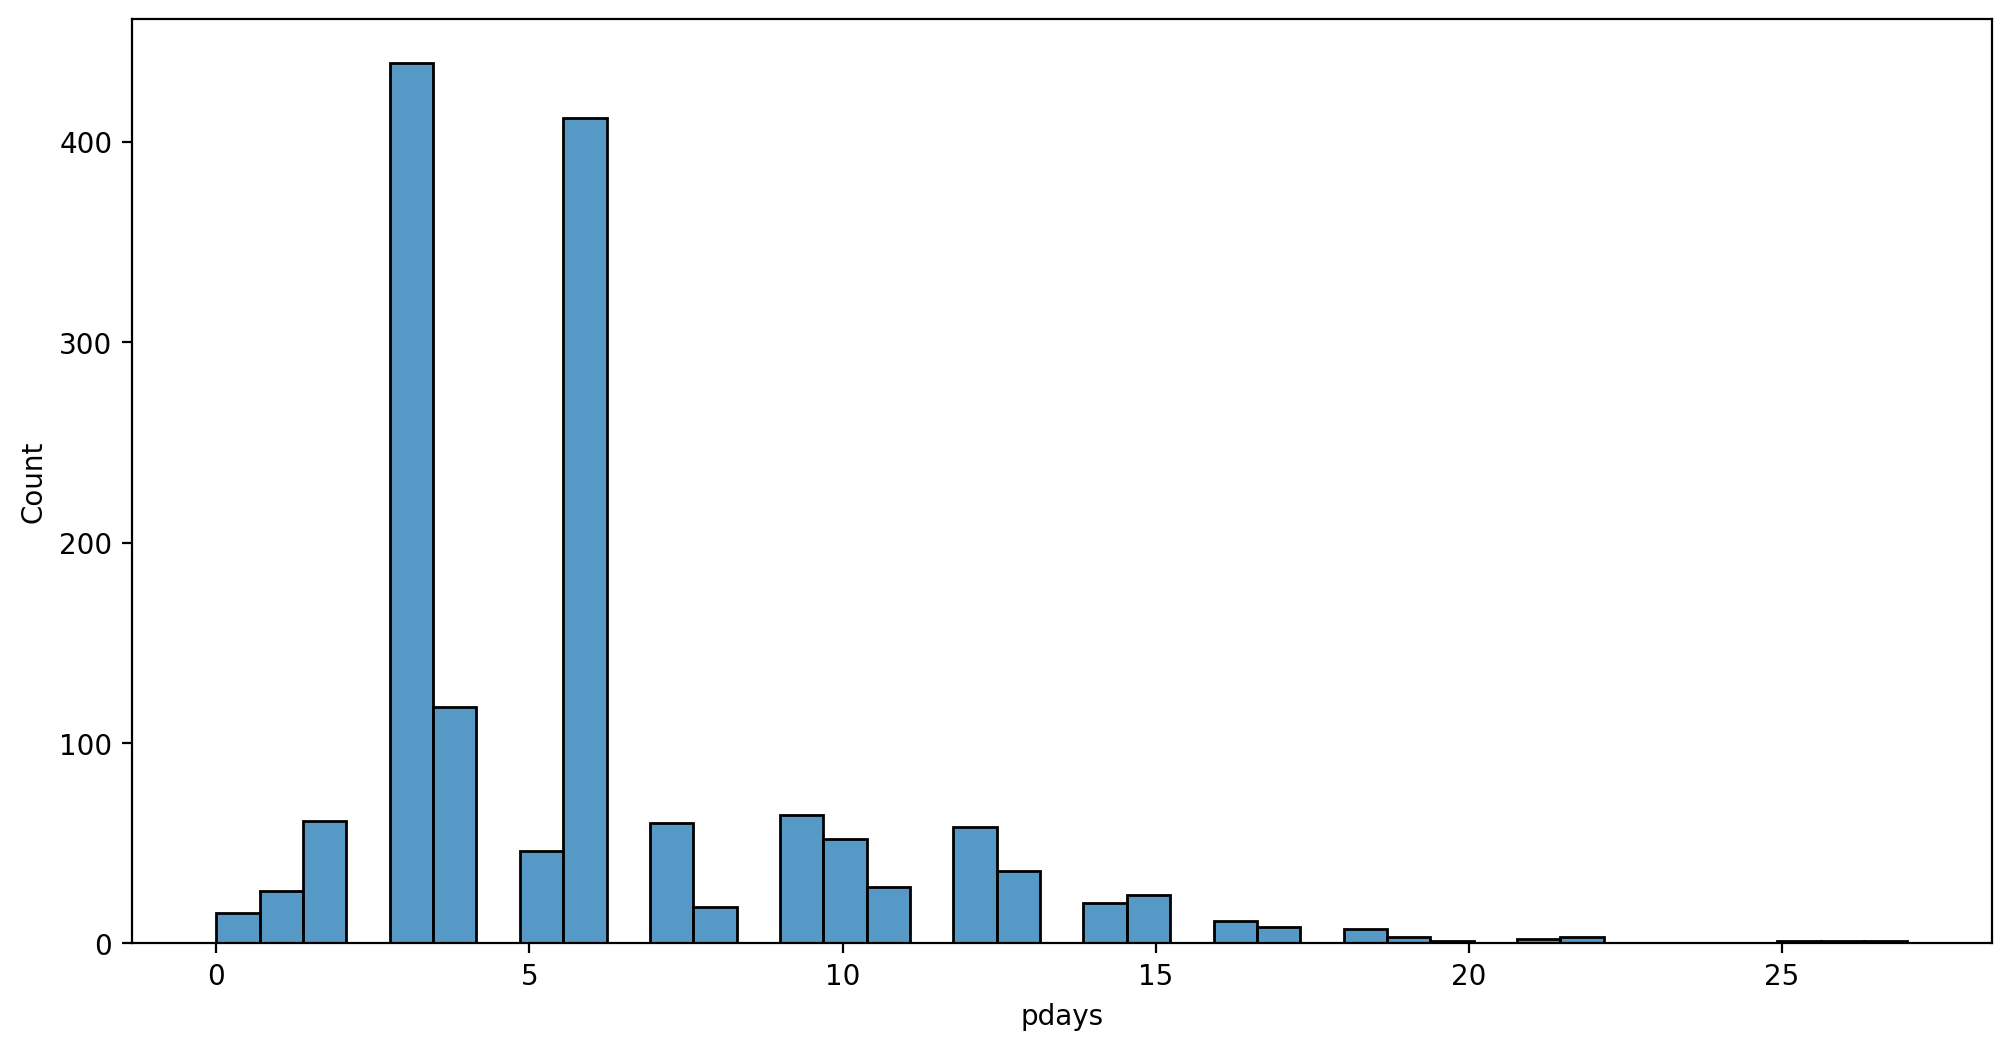

In [9]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df[df['pdays'] != 999], x = 'pdays')

In [10]:
df['contact'].unique() #Whether contacted via a landline or a cellphone

array(['telephone', 'cellular'], dtype=object)

In [11]:
df['duration'] #Length of call in seconds

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

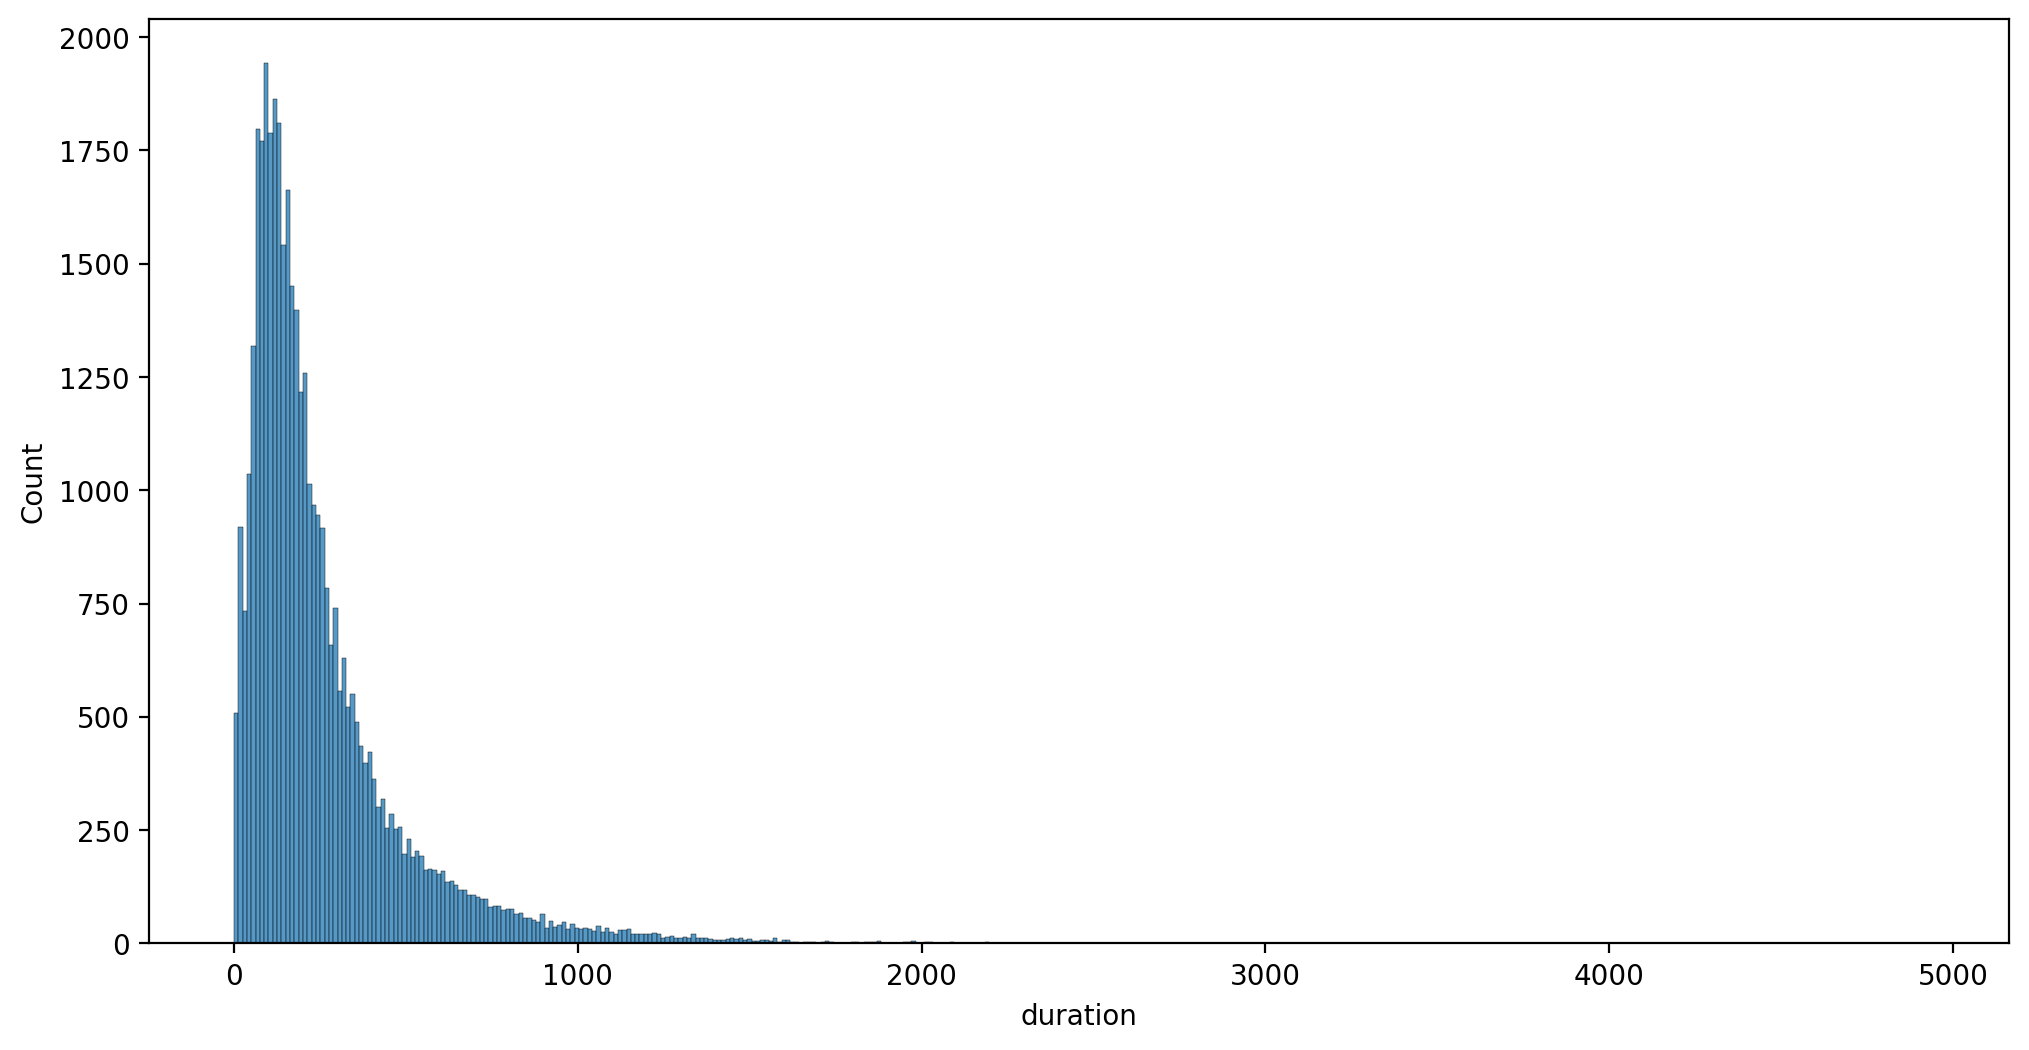

In [12]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'duration')

<Axes: xlabel='duration', ylabel='Count'>

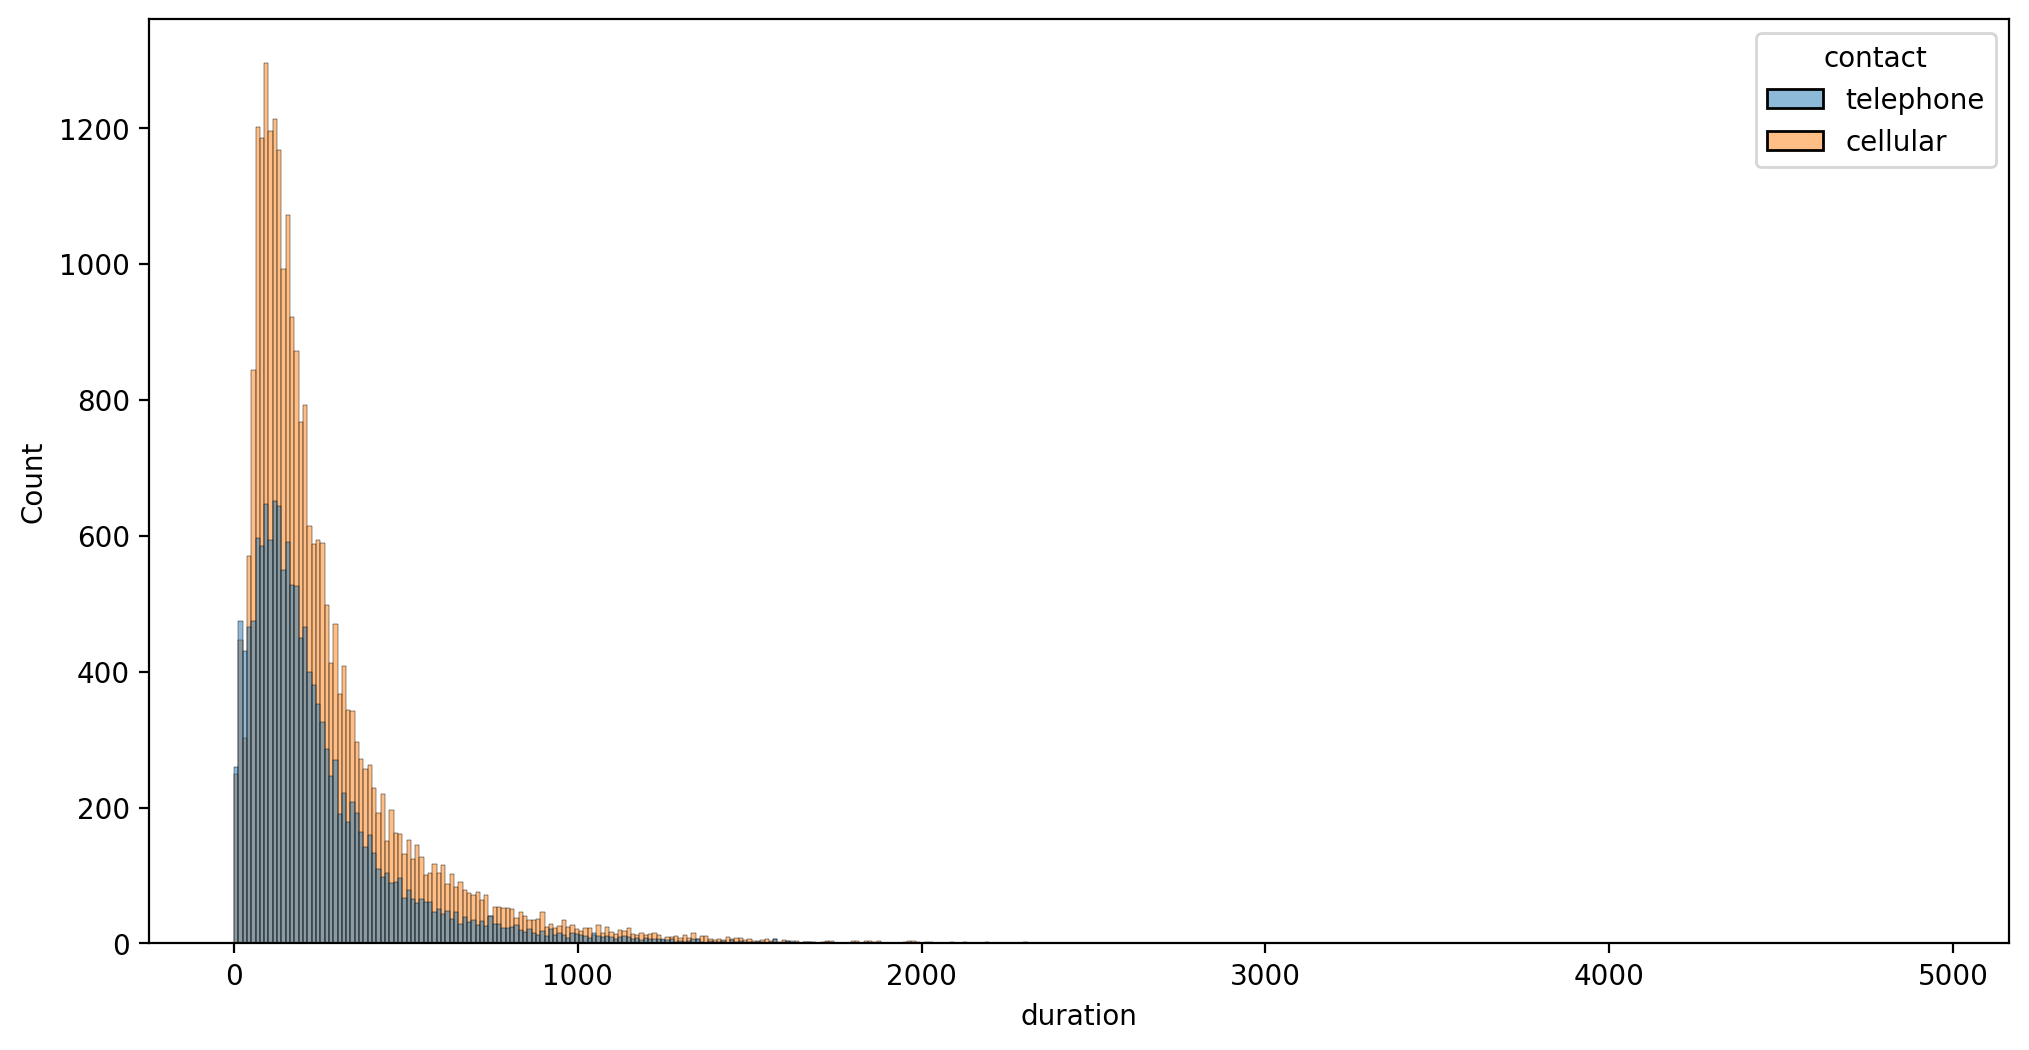

In [13]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'duration', hue = 'contact')

(0.0, 1000.0)

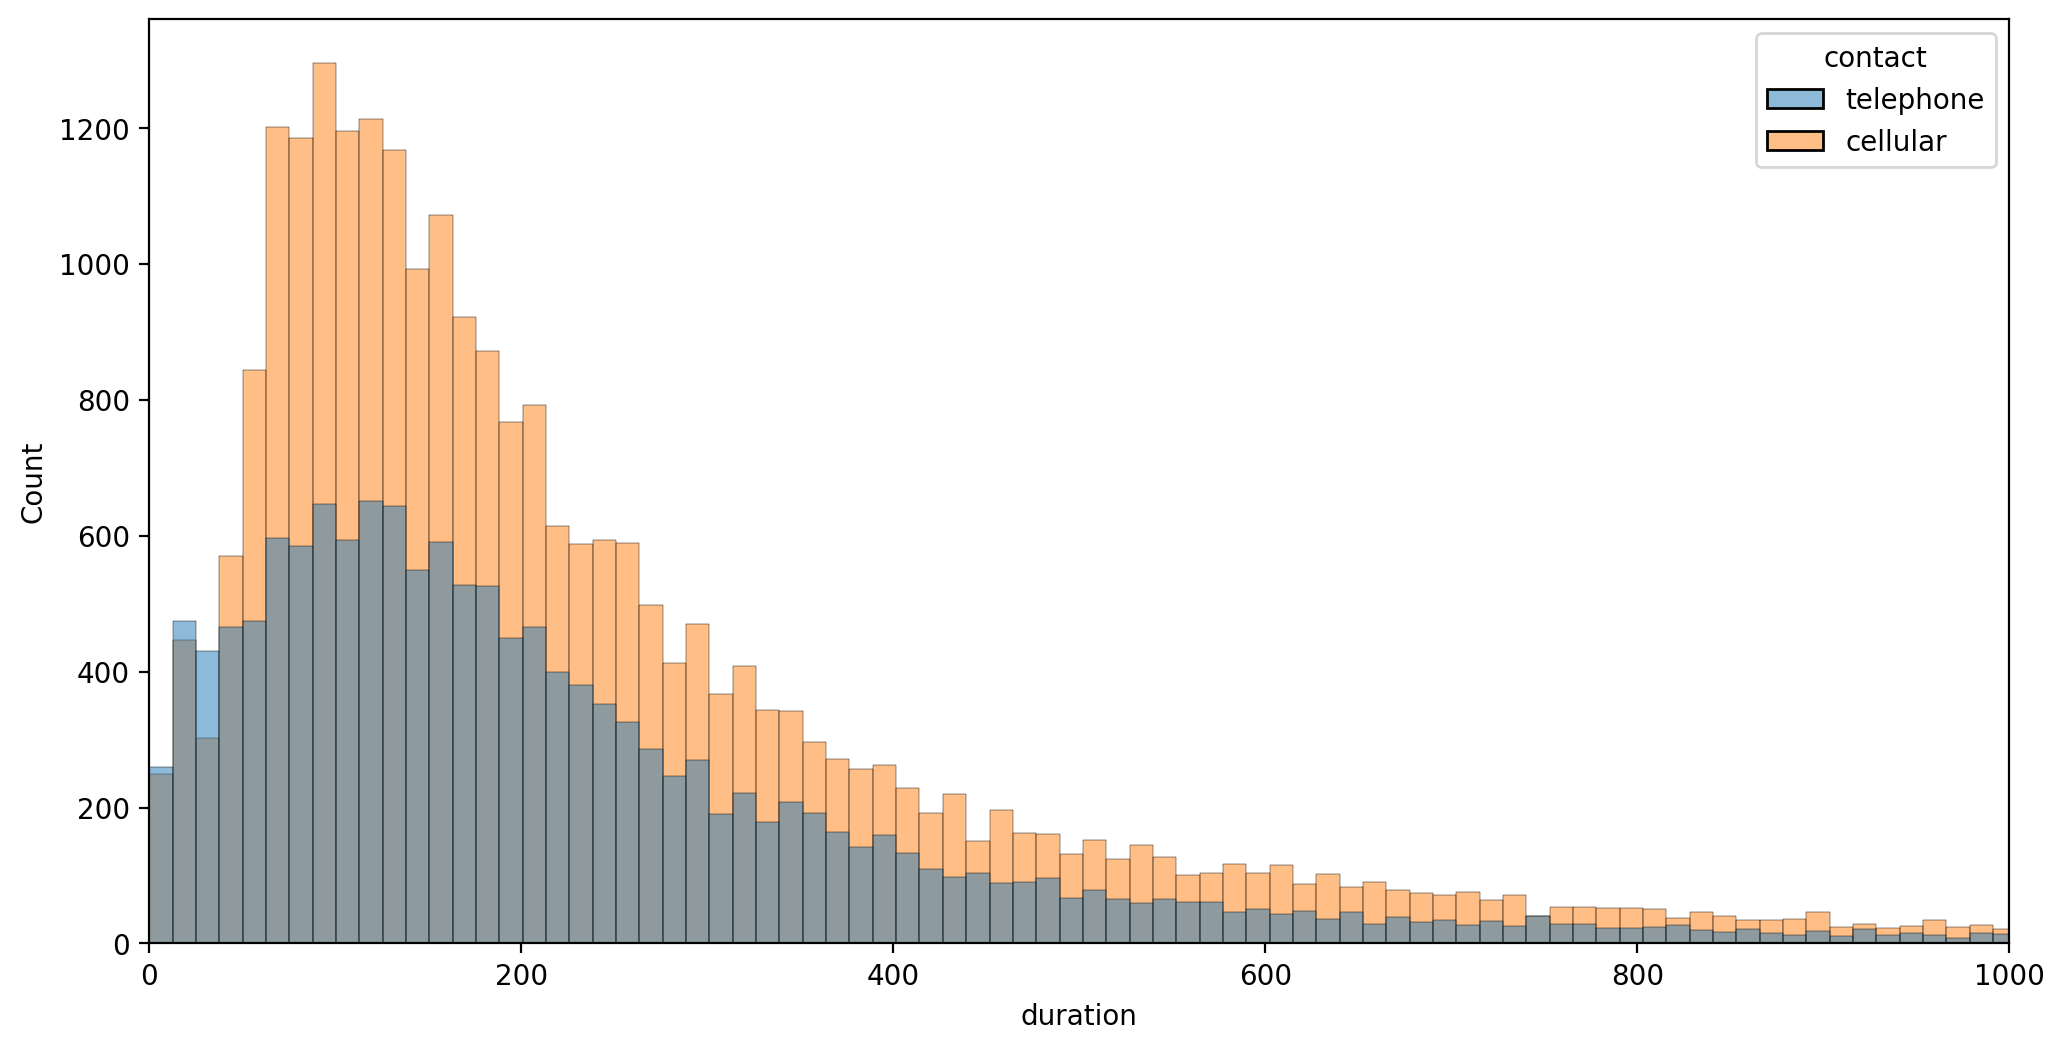

In [14]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'duration', hue = 'contact')
plt.xlim(0, 1000)

<Axes: xlabel='contact', ylabel='count'>

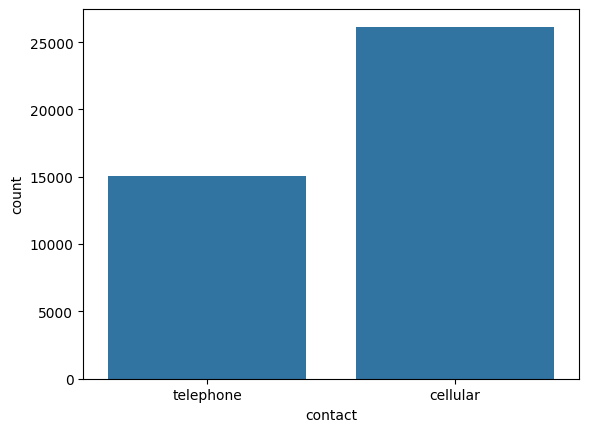

In [15]:
sns.countplot(data = df, x = 'contact')

In [16]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [17]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object', name='job')

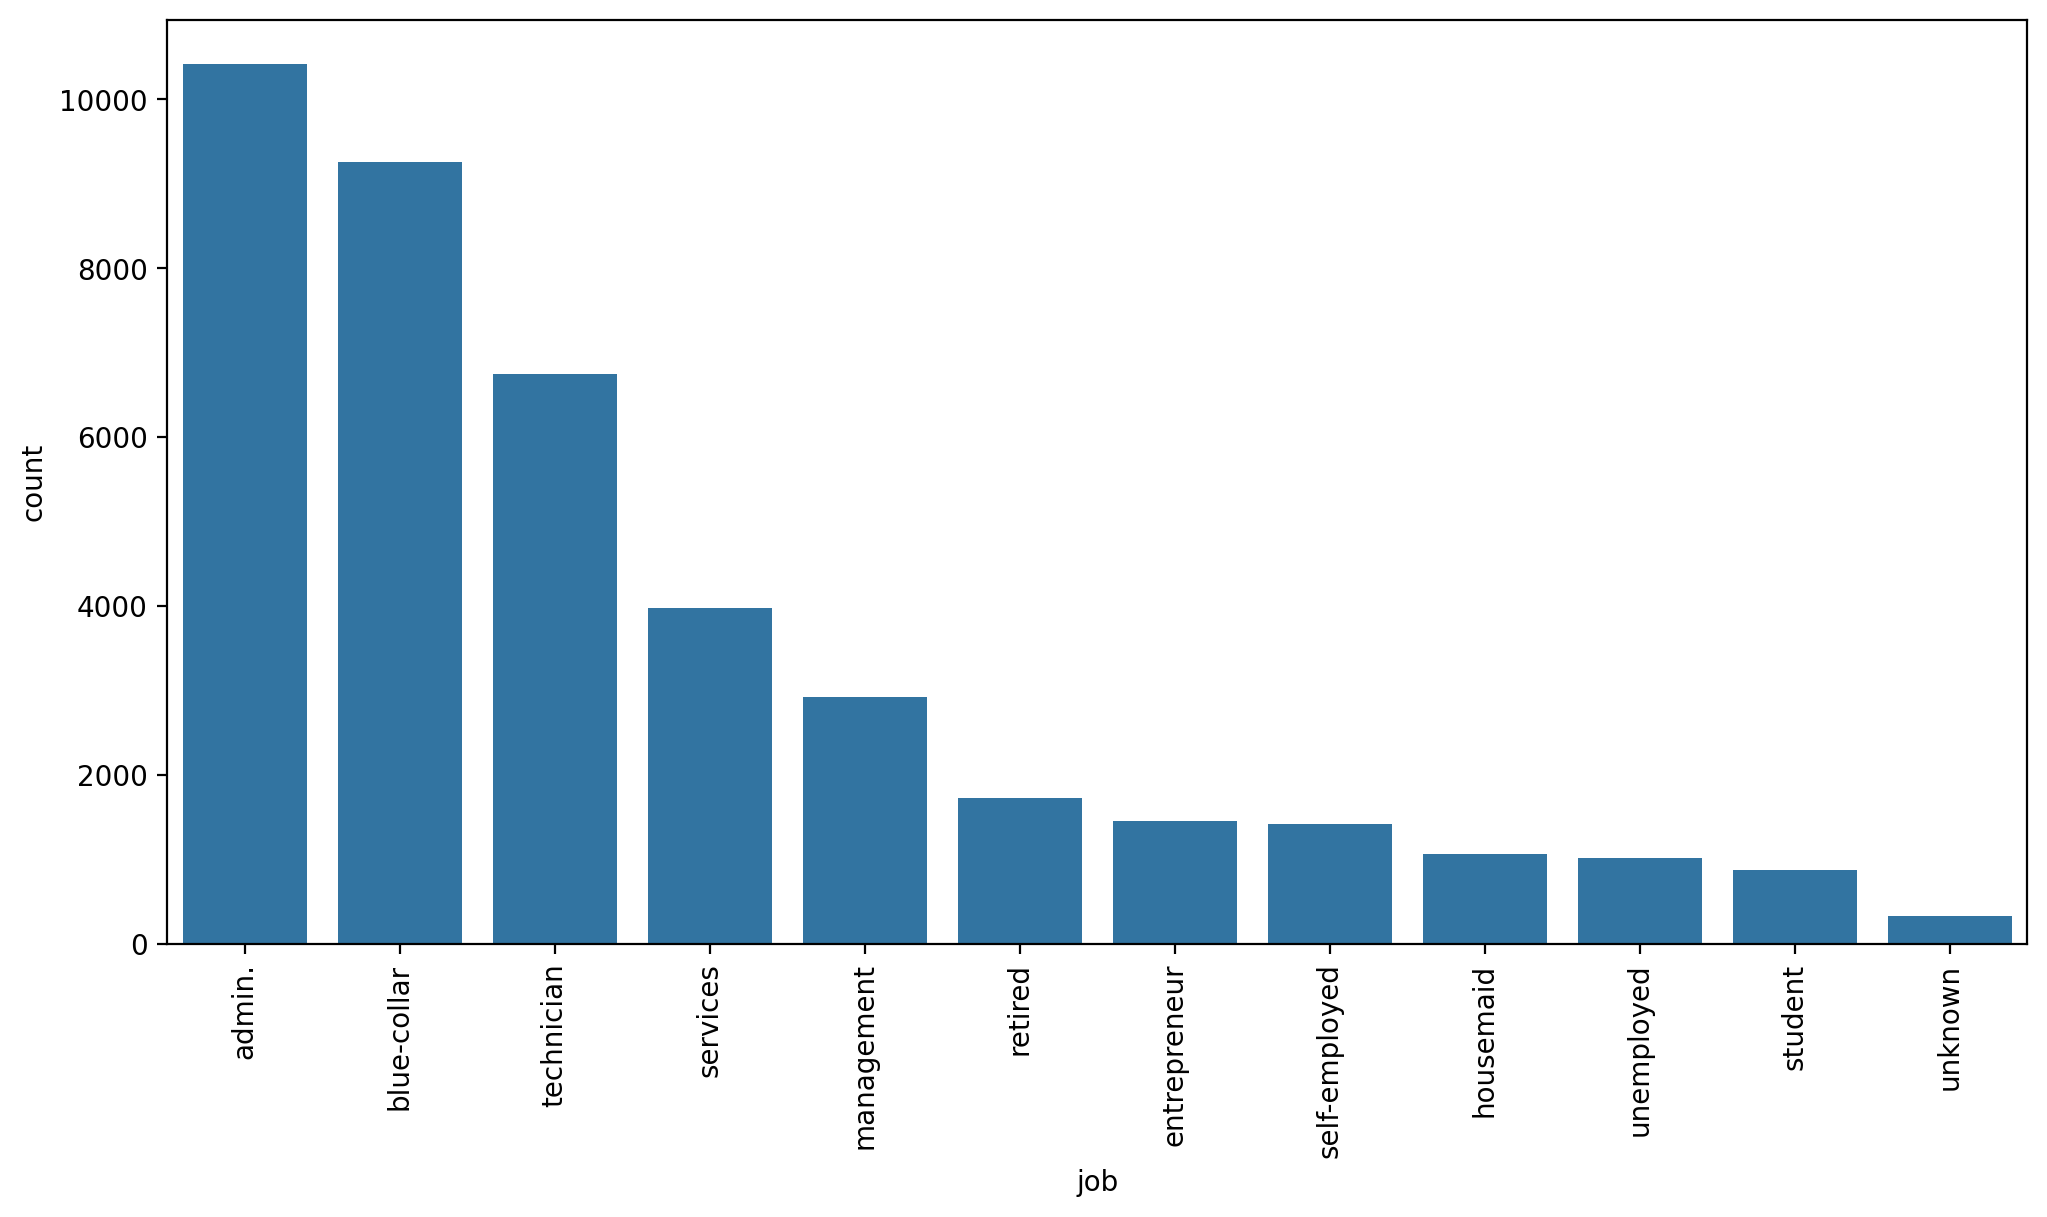

In [18]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.countplot(data = df, x = 'job', order = df['job'].value_counts().index)
plt.xticks(rotation = 90);

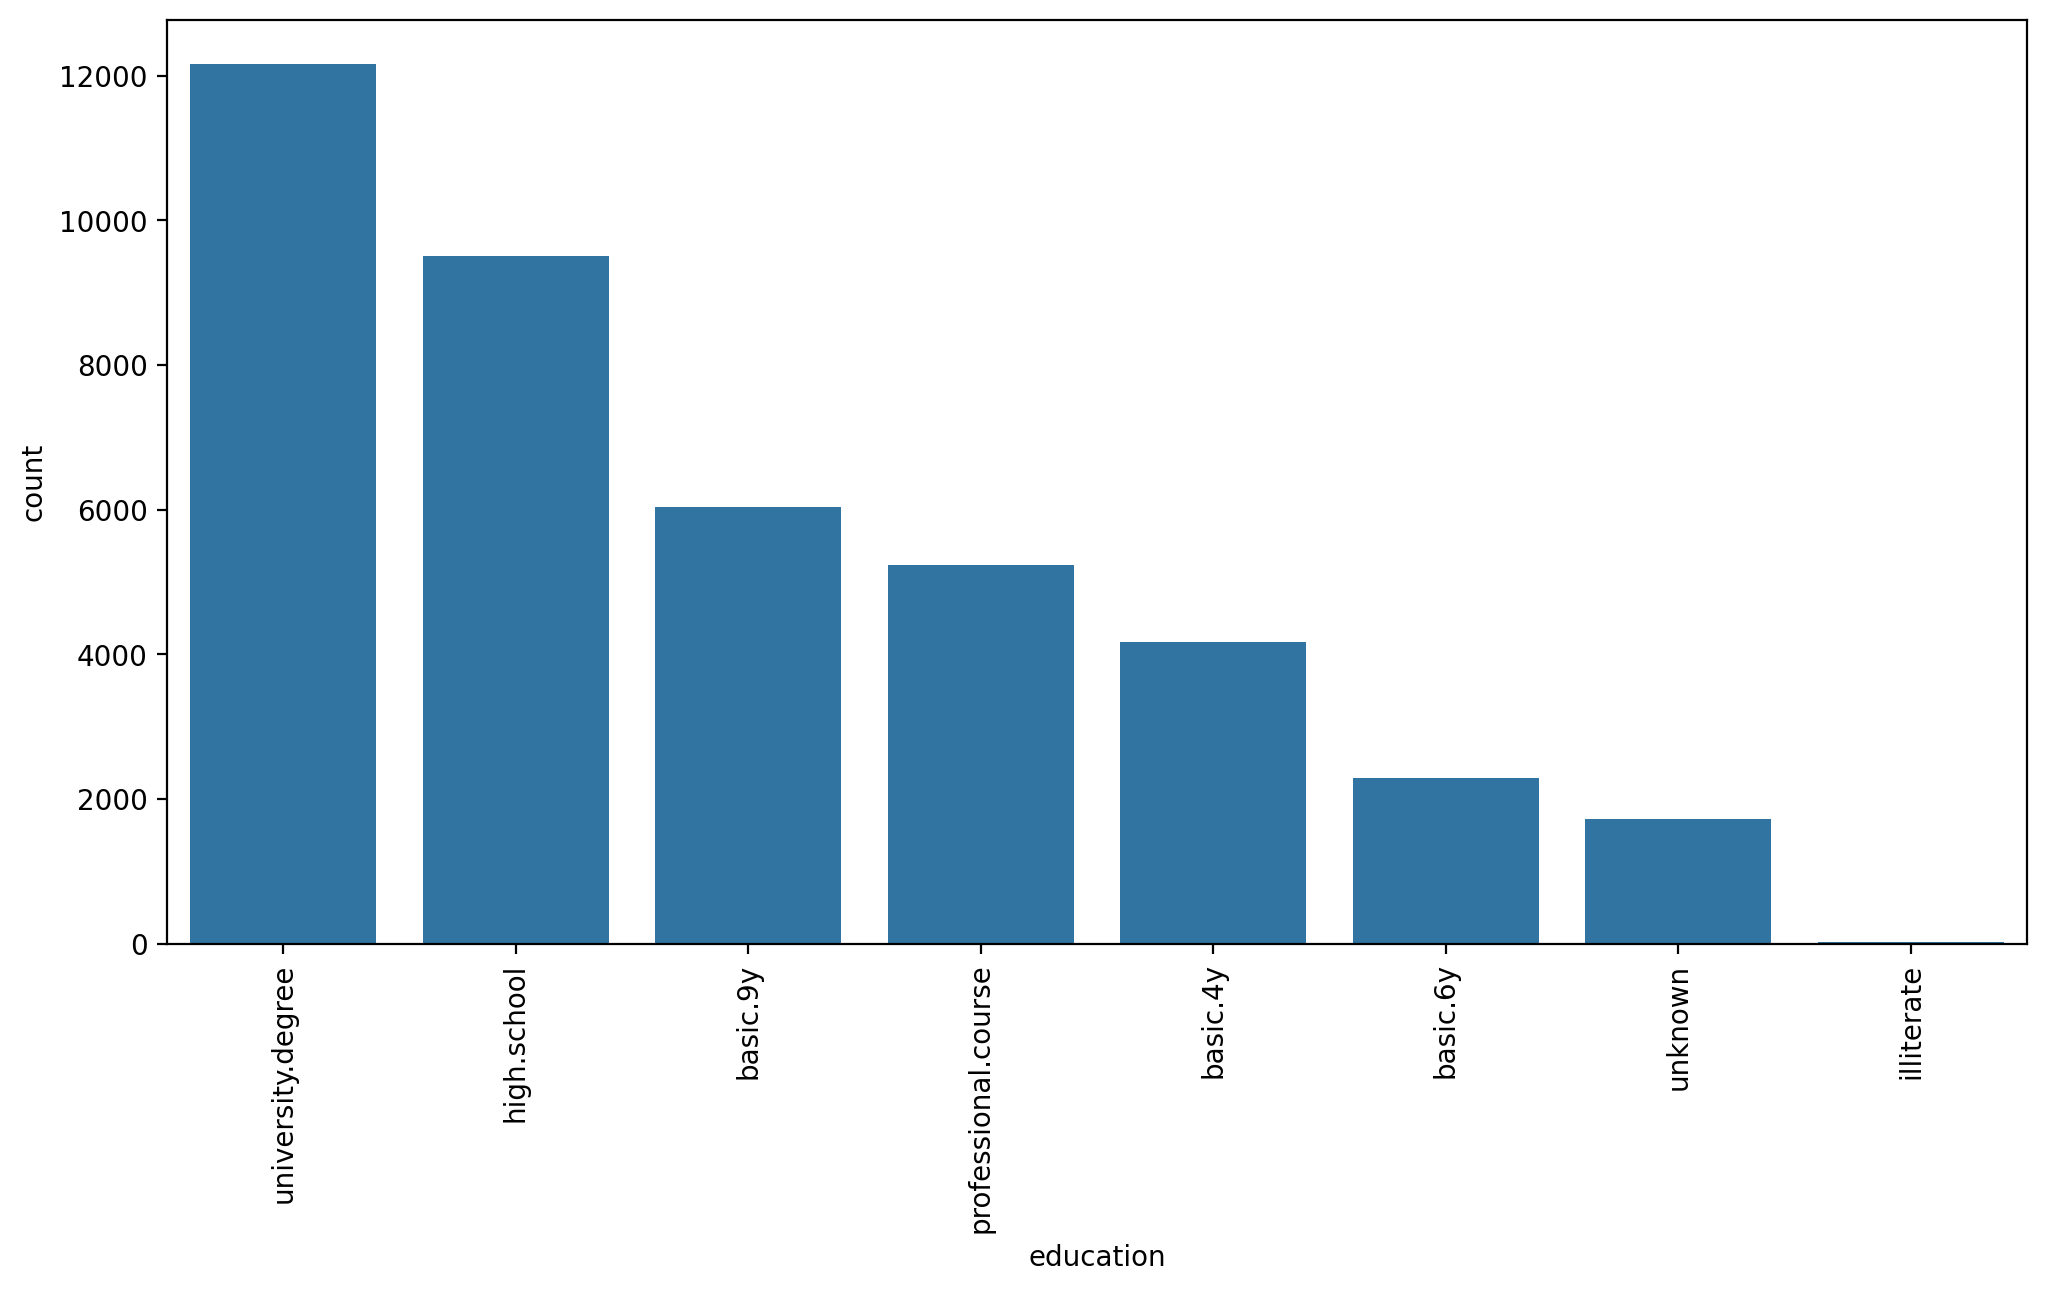

In [19]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.countplot(data = df, x = 'education', order = df['education'].value_counts().index)
plt.xticks(rotation = 90);

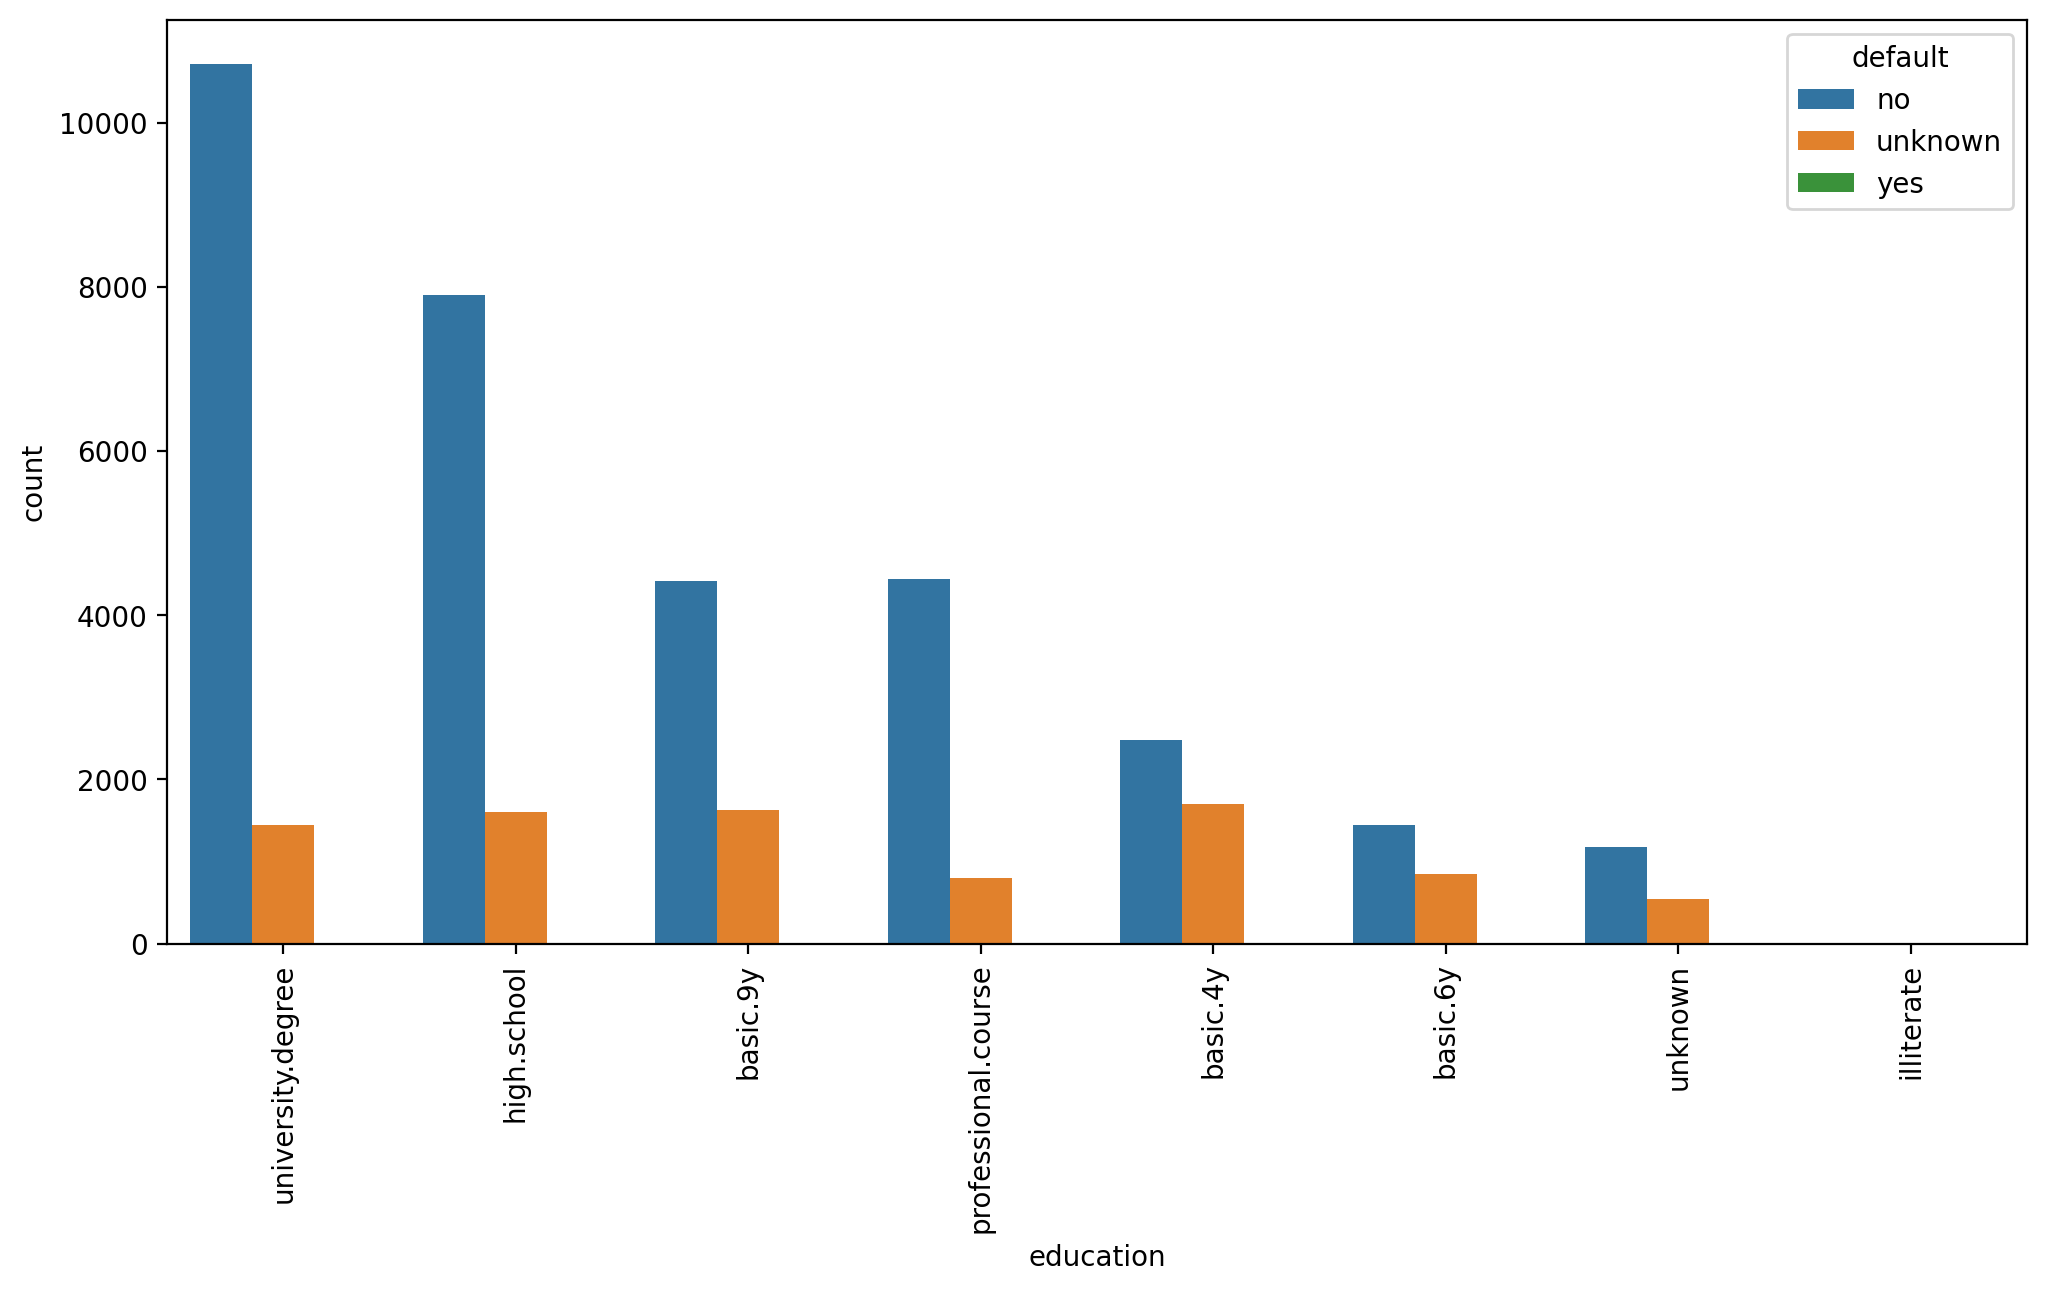

In [20]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.countplot(data = df, x = 'education', order = df['education'].value_counts().index, hue = 'default')
plt.xticks(rotation = 90);
#Notice there's almost nobody who defaulted on a loan

<Axes: xlabel='default', ylabel='count'>

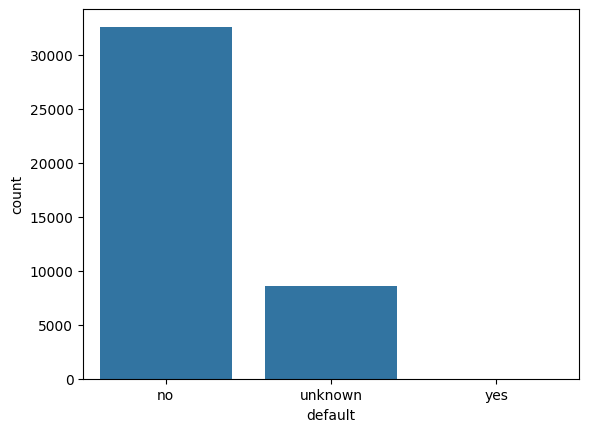

In [21]:
sns.countplot(data = df, x = 'default')

In [22]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [23]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

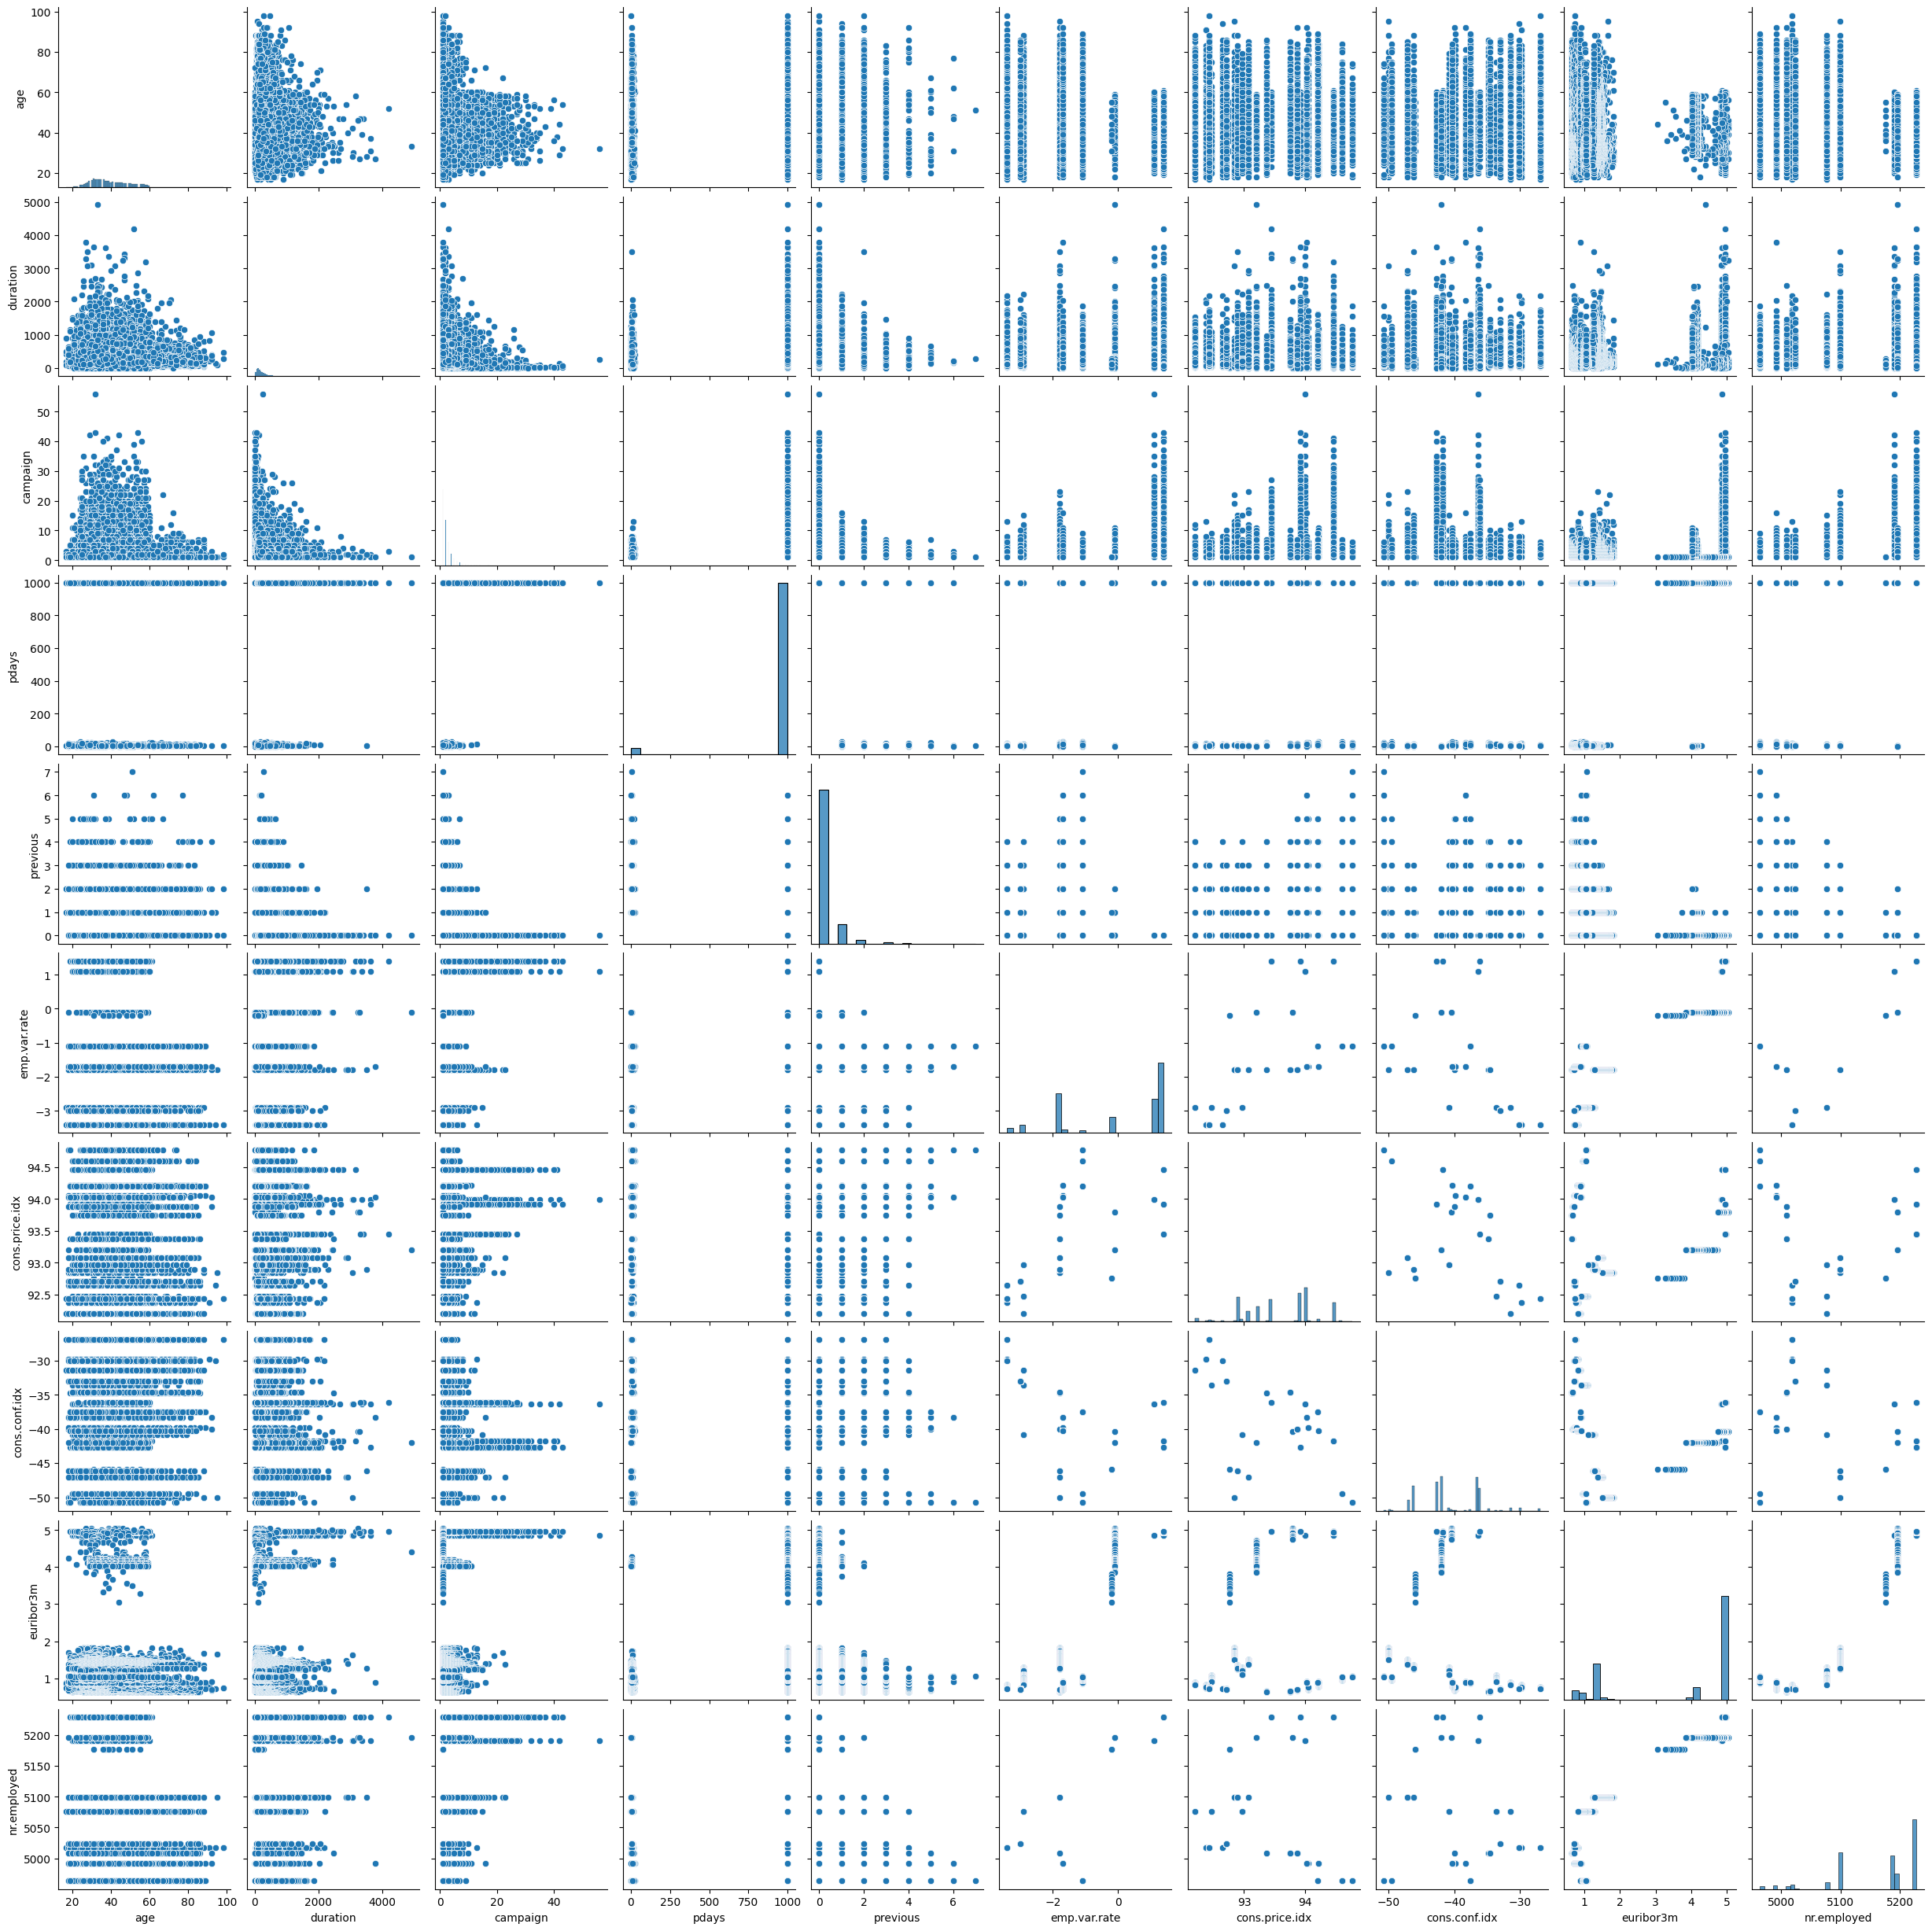

In [24]:
sns.pairplot(df) #This could take a while or kill your kernel, or maybe even crash your computer

Data Preparation:

In [25]:
X = pd.get_dummies(df, dtype = int)
#K-Means Clustering works off of a distance metric, so you have to deal with categorical data before you can fit a K-Means Clustering model to the data
#But because it's unsupervised learning, you don't have to deal with the dummy variable trap by dropping first

In [26]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [27]:
from sklearn.preprocessing import StandardScaler
#As features can have different ranges, scaling is required for K-Means Clustering to ensure that these ranges don't distort a particular feature dimension

In [28]:
scaler = StandardScaler()

In [29]:
scaled_X = scaler.fit_transform(X)
#Notice that the entire dataset is being transformed because there's no label or test set to make data leakage possible

Fitting A K-Means Clustering Model:

In [30]:
from sklearn.cluster import KMeans

In [31]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to t

In [32]:
model = KMeans(n_clusters = 2)
#The n_clusters parameter sets the number of clusters, or 'k', to group the data into
#This value highly depends on the domain

In [33]:
cluster_labels = model.fit_predict(scaled_X)
#The fit_predict method sets up the clusters and then predicts the clusters each data point best fits into
#It's analogous to fit_transform for scaling since there's no y label

In [34]:
cluster_labels #It technically doesn't matter whether the first cluster is 1's or 0's, as these numbers can swap sometimes when rerunning this line
#The random_state parameter can be used to circumvent this and replicate others' results

array([0, 0, 0, ..., 1, 1, 1], shape=(41188,), dtype=int32)

In [35]:
X['Cluster'] = cluster_labels #Rejoining the original data with their new clusters

In [36]:
X.corr()['Cluster']

age                    -0.019659
duration                0.040051
campaign               -0.129101
pdays                  -0.267686
previous                0.478442
                          ...   
poutcome_nonexistent   -0.544348
poutcome_success        0.254379
subscribed_no          -0.294748
subscribed_yes          0.294748
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

In [37]:
X.corr()['Cluster'].iloc[:-1]

age                    -0.019659
duration                0.040051
campaign               -0.129101
pdays                  -0.267686
previous                0.478442
                          ...   
poutcome_failure        0.464271
poutcome_nonexistent   -0.544348
poutcome_success        0.254379
subscribed_no          -0.294748
subscribed_yes          0.294748
Name: Cluster, Length: 65, dtype: float64

In [38]:
X.corr()['Cluster'].iloc[:-1].sort_values()

euribor3m              -0.959267
emp.var.rate           -0.932603
nr.employed            -0.886120
cons.price.idx         -0.679394
poutcome_nonexistent   -0.544348
                          ...   
subscribed_yes          0.294748
month_apr               0.357904
contact_cellular        0.410508
poutcome_failure        0.464271
previous                0.478442
Name: Cluster, Length: 65, dtype: float64

<Axes: >

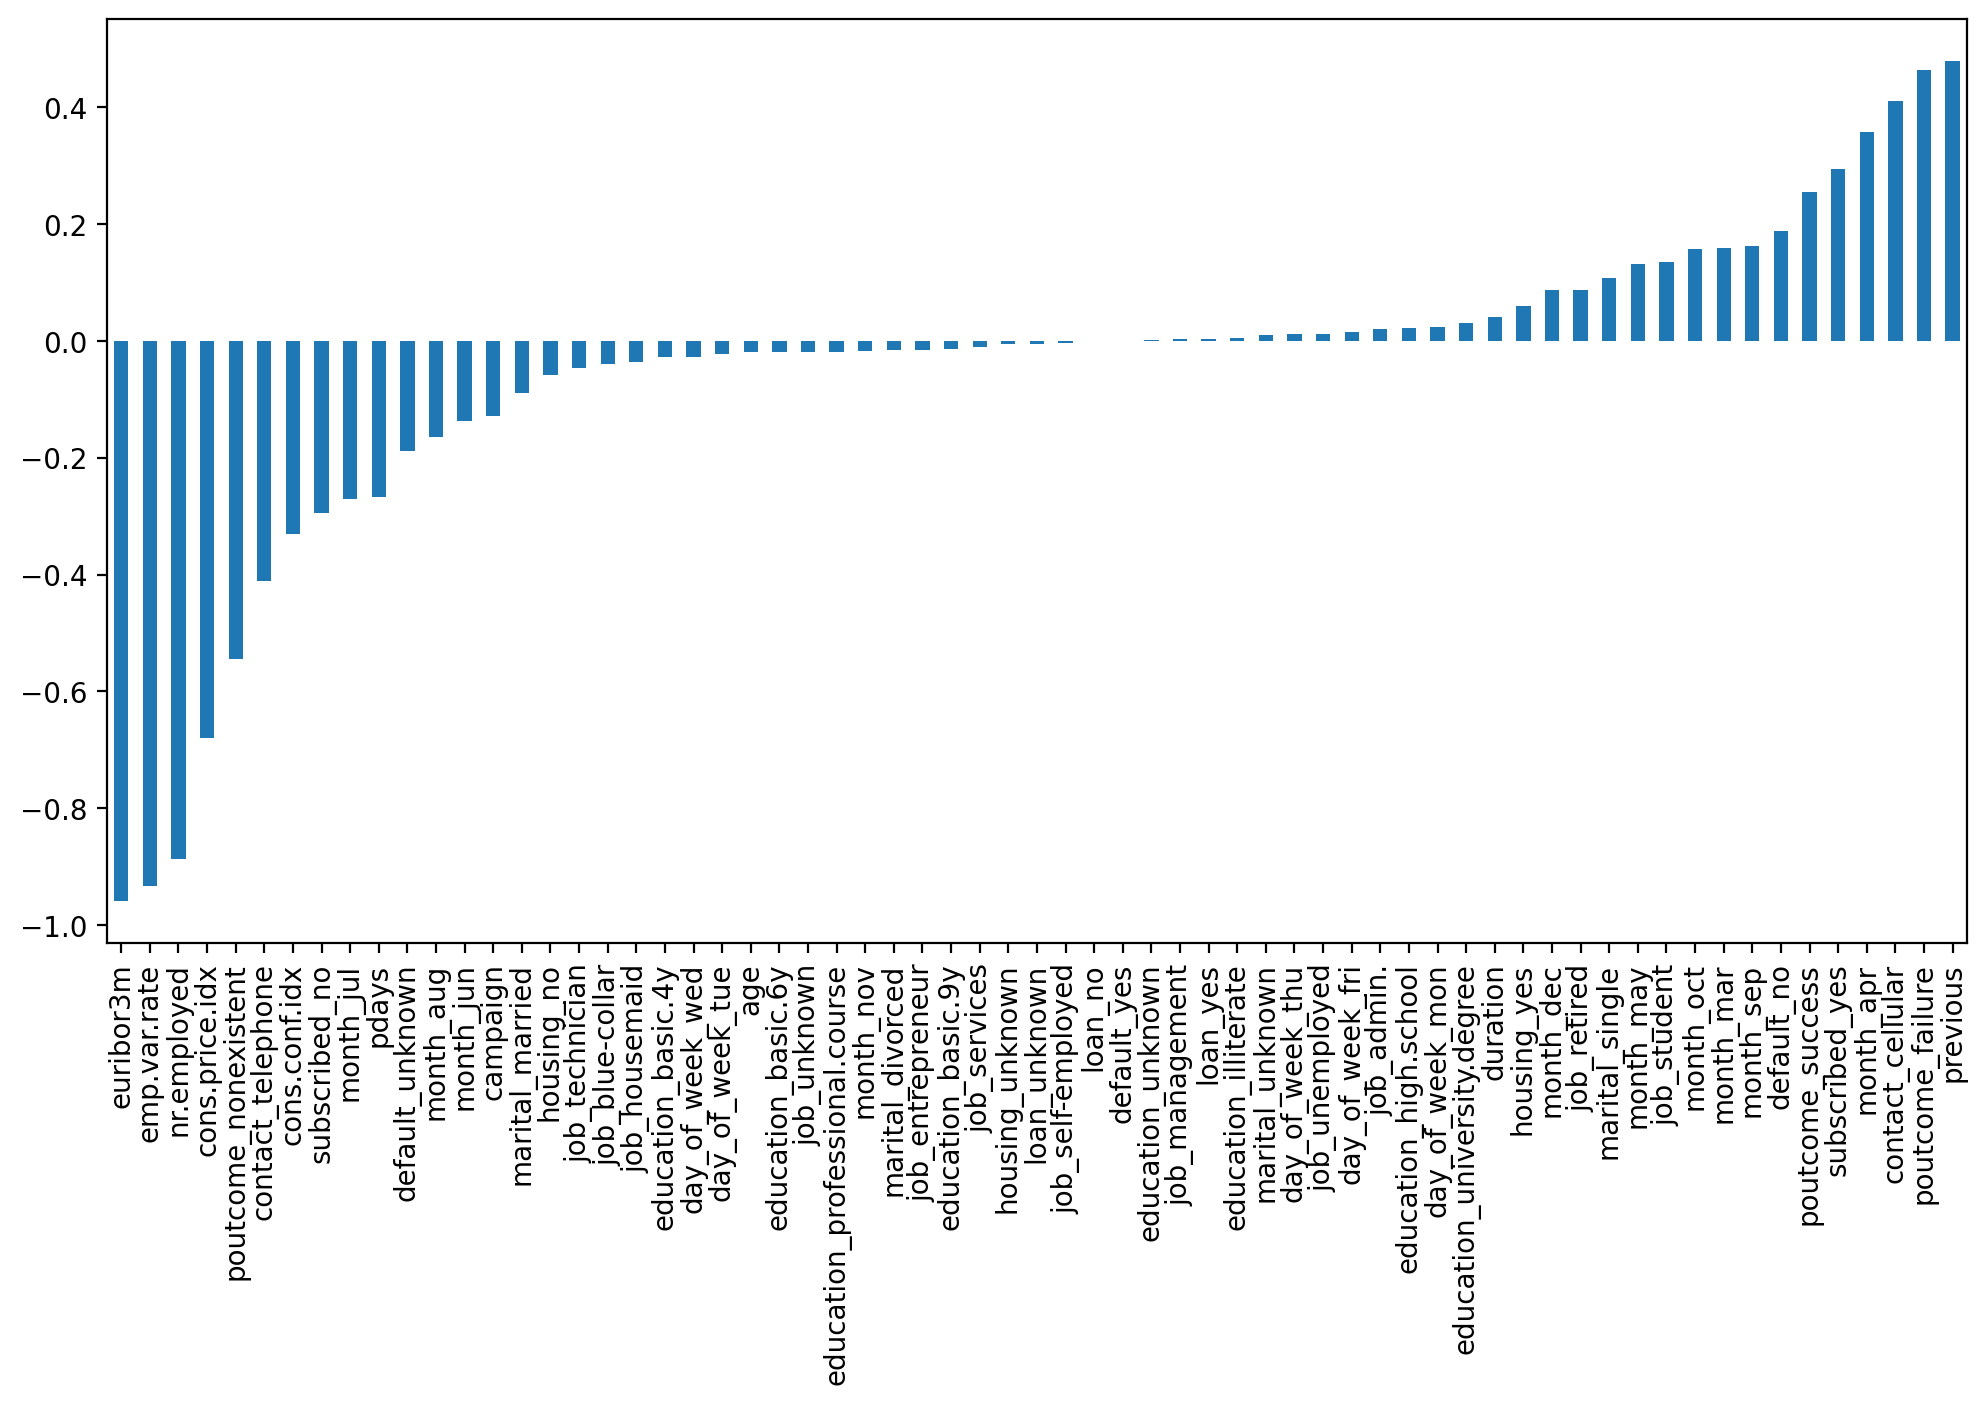

In [39]:
plt.figure(figsize = (12, 6), dpi = 200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind = 'bar')

Choosing A K Value:

In [40]:
#The elbow method:
ssd = []

for k in range(2, 10):

    model = KMeans(n_clusters = k)
    model.fit(scaled_X)


    ssd.append(model.inertia_) #Scikit-Learn labels the 'sum of squared distances' as 'inertia_', which is a distance metric between points and their cluster centers

In [41]:
ssd

[2469792.492062293,
 2382895.7917154874,
 2336787.7089347094,
 2276412.24160408,
 2173134.170359537,
 2122712.1694225958,
 2141499.3426416367,
 2092231.0308150537]

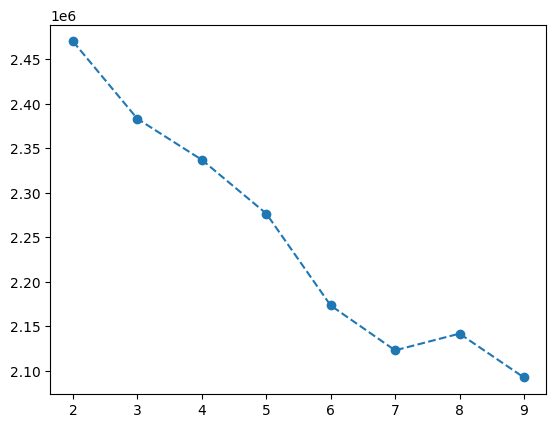

In [42]:
plt.plot(range(2, 10), ssd, 'o--')

In [43]:
pd.Series(ssd)

0    2.469792e+06
1    2.382896e+06
2    2.336788e+06
3    2.276412e+06
4    2.173134e+06
5    2.122712e+06
6    2.141499e+06
7    2.092231e+06
dtype: float64

In [44]:
pd.Series(ssd).diff()

0              NaN
1    -86896.700347
2    -46108.082781
3    -60375.467331
4   -103278.071245
5    -50422.000937
6     18787.173219
7    -49268.311827
dtype: float64